# Demo: rotating tile from LLC90

In this demo, we see how we can rotate an arbirtray sub-domain based on the lat-lon-cap horizontal discretization on the global ocean. We take a look at **Tile 10** grid information, whic his rotated and compare it with **Tile 2**, which is an unrotated grid.  

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import ecco_v4_py as ecco
from dask.distributed import Client
from glob import glob

import os
import warnings

In [2]:
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

### Load ECCOv4r4 global data and grid 

Load up NetCDF formatted monthly potential temperature data

In [3]:
dataDir = f'/scratch2/shared/ecco/v4r4'

In [4]:
%%time
ds = xr.open_mfdataset(glob(f'{dataDir}/nctiles_monthly/THETA/*/*.nc'))
ds

CPU times: user 17.4 s, sys: 4.17 s, total: 21.5 s
Wall time: 25.4 s


<xarray.Dataset>
Dimensions:    (i: 90, j: 90, k: 50, nv: 2, tile: 13, time: 312)
Coordinates:
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes:
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    Project:                      Estimating the Circulation and Climate of t...
    cdm_data_type:                Grid
    geospatial_lon_units:         degrees_east
    Metadata_Conventions:         CF-1.6, Unidata Dataset Discovery v1.0, GDS...
    no_data:                      NaNf
    geospatial_lat_units:         degrees_north
    product_time_coverage_end:    2017-12-31T12:00:00
    geospatial_vertical_min:      -5906.25
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Sat Aug 17 21:07:19 2019
    geospatial_lat_max:           89.739395
    geospatial_lat_min:           -89.873055
    nx:                           90
    ny:                           90
    geospatial_lon_max:           179.98691
    geospatial_lon_min:           -179.98895
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

Load GRID file

In [5]:
dgrid = xr.open_dataset(f'{dataDir}/nctiles_grid/ECCO-GRID.nc')
dgrid.load()
ds = ds.merge(dgrid)
ds

,Array,Chunk
Bytes,2.50 kB,8 B
Shape,"(312,)","(1,)"
Count,936 Tasks,312 Chunks
Type,int64,numpy.ndarray
,Array,Chunk
Bytes,4.99 kB,16 B
Shape,"(312, 2)","(1, 2)"
Count,936 Tasks,312 Chunks
Type,datetime64[ns],numpy.ndarray
,Array,Chunk


Plot surface tempertaure, SST. 

**NOTE:** tiles 7,8,9,10,11, and 12 are rotated by 90 degrees. 

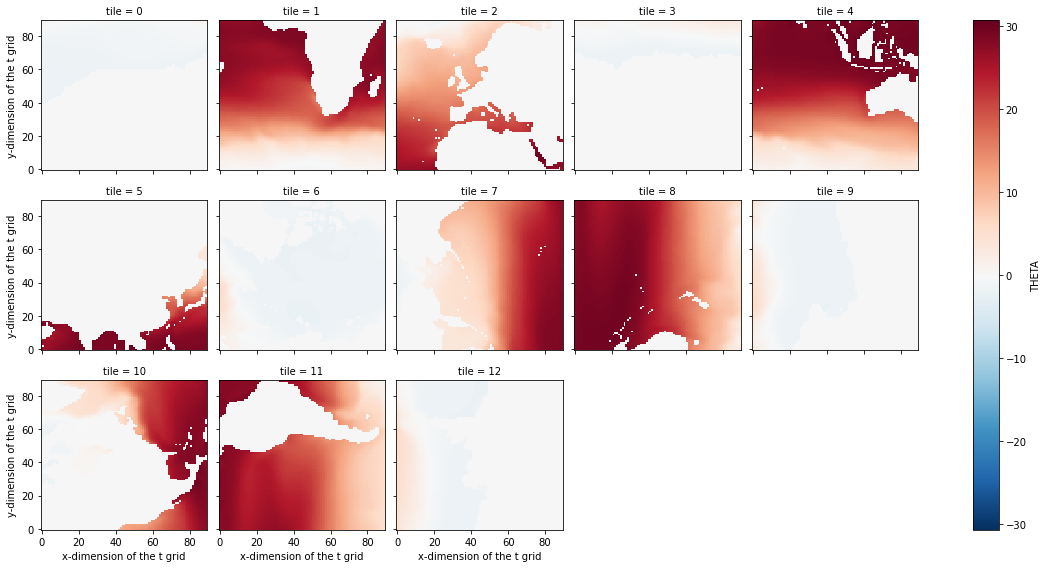

In [6]:
sst = ds.THETA.isel(k=0).mean('time')
sst.plot(col='tile',col_wrap=5,figsize=(16,8));

Plot **Tile 10** and **2**, to show how untampered data is displayed. 

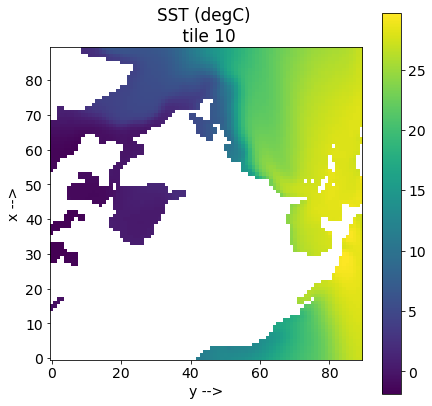

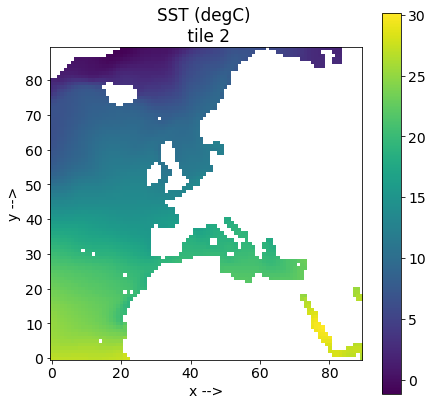

In [7]:
plt.rcParams.update({'figure.figsize':(7,7),'font.size':14})

# Step 1, select the tile to plot using the **.isel( )** syntax.
tile_to_plot= sst.isel(tile=10).where(ds.hFacC.isel(tile=10,k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SST (degC) \n tile 10')
plt.xlabel('y -->')
plt.ylabel('x -->')
plt.show()



# Step 1, select the tile to plot using the **.isel( )** syntax.
tile_to_plot= sst.isel(tile=2).where(ds.hFacC.isel(tile=2,k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SST (degC) \n tile 2')
plt.xlabel('x -->')
plt.ylabel('y -->')
plt.show()

# i, j index behaviour in rotated tiles

Tile 2: unrotated

Tile 10: rotated

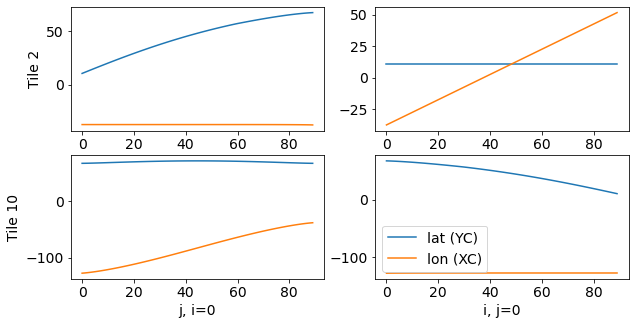

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot( ds.YC.sel(tile=2, i=0), label='lat')
plt.plot( ds.XC.sel(tile=2, i=0), label='lon' )
plt.ylabel('Tile 2')

plt.subplot(223)
plt.plot( ds.YC.sel(tile=10, i=0), label='lat')
plt.plot( ds.XC.sel(tile=10, i=0), label='lon' )
plt.xlabel('j, i=0')
plt.ylabel('Tile 10')

plt.subplot(222)
plt.plot( ds.YC.sel(tile=2, j=0), label='lat')
plt.plot( ds.XC.sel(tile=2, j=0), label='lon' )

plt.subplot(224)
plt.plot( ds.YC.sel(tile=10, j=0), label='lat (YC)')
plt.plot( ds.XC.sel(tile=10, j=0), label='lon (XC)' )

plt.xlabel('i, j=0')
plt.legend()
plt.show()

### Increasing indices

As **i** increases, Tile 2 longitudes *increase* and Tile 10 latitudes *decrease*.

As **j** increases, Tile 2 latitudes *increase* and Tile 10 longitudes *increases*.

In [9]:
def plotCoord (da, t1=None, t2=None, filename=None):
    iidx = [0,20,40,60,80]
    jidx = iidx
    plt.figure(figsize=(16,8))
    
    plt.subplot(121)
    for idx in np.arange(len(iidx)):
        if da.dims[-1] is 'i':
            plt.plot( da.sel(j=jidx[idx]), label='j=%i'%jidx[idx] )
        else:
            plt.plot( da.sel(j_g=jidx[idx]), label='j_g=%i'%jidx[idx] )
    if t1 is not None: 
        plt.title(t1)
    plt.xlabel('i')
    plt.legend()
    
    plt.subplot(122)
    for idx in np.arange(len(iidx)):
        if da.dims[-1] is 'i':
            plt.plot( da.sel(i=iidx[idx]), label='i=%i'%iidx[idx] )
        else:
            plt.plot( da.sel(i_g=iidx[idx]), label='i_g=%i'%iidx[idx] )
    if t2 is not None: 
        plt.title(t2)
    plt.xlabel('j')
    plt.legend()

    plt.show()
    
    if filename is not None:
        plt.savefig(filename,bbox_inches='tight',dpi=300)
    
    return None

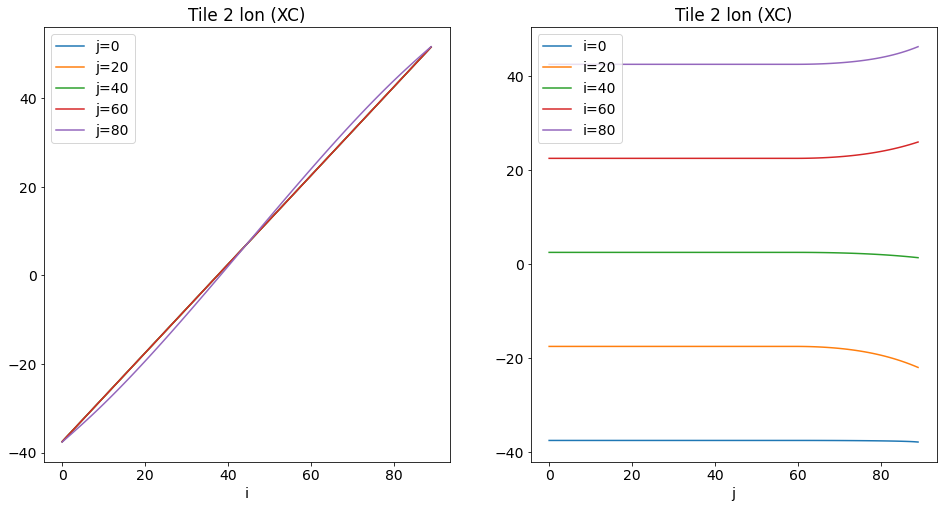

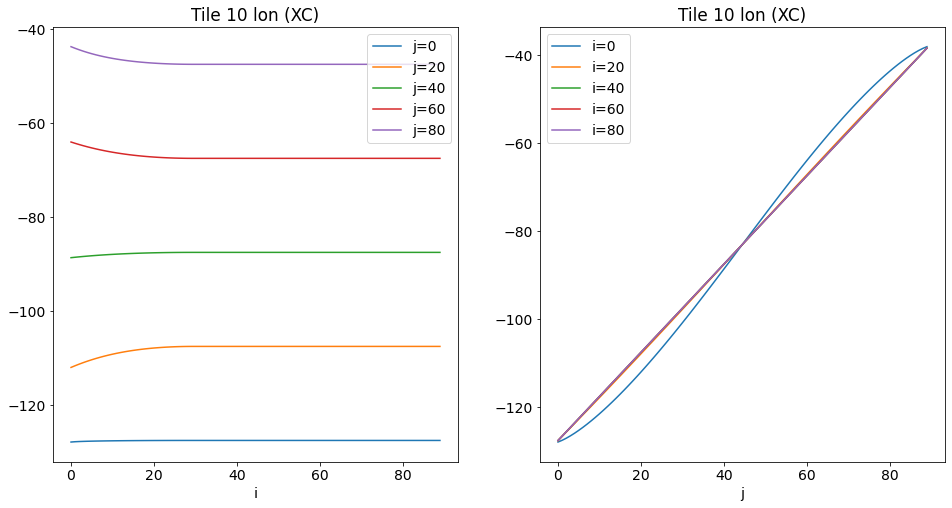

In [10]:
plotCoord (ds.XC.sel(tile=2), t1="Tile 2 lon (XC)", t2="Tile 2 lon (XC)")
plotCoord (ds.XC.sel(tile=10), t1="Tile 10 lon (XC)", t2="Tile 10 lon (XC)")

# Rotate a tile

Swap **i** and **j** indices in DataSet

reshape **XC** and **YC**

Renaming the indices, transposing and flipping the values is what works for domains that can potentially be non-square dimensions ($i \neq j$). We can't use ```np.rot90()``` in cases where the domain is rectangular in the horizontal direction.

In [11]:
YC10 = ds.YC.sel(tile=10)
YC10t = YC10.T.rename({'i':'j','j':'i'})
YC10t.values = np.flipud(YC10t.values)

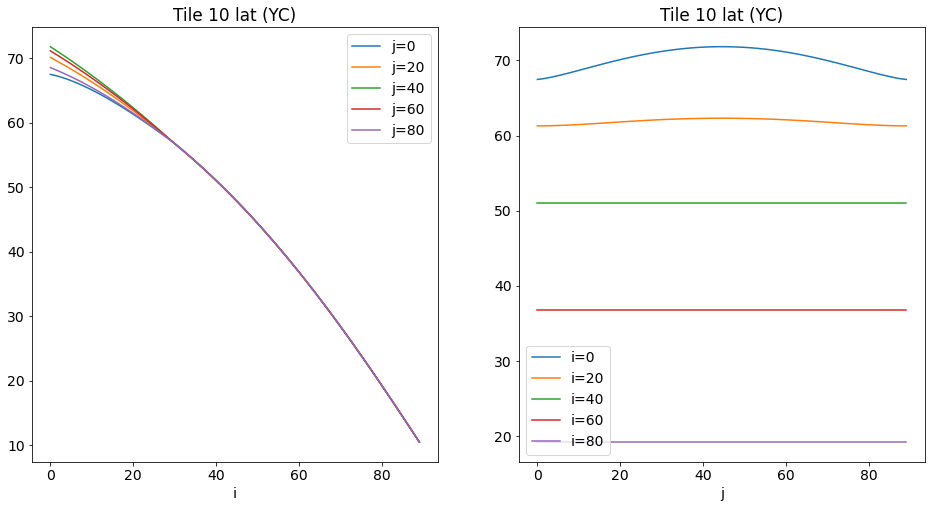

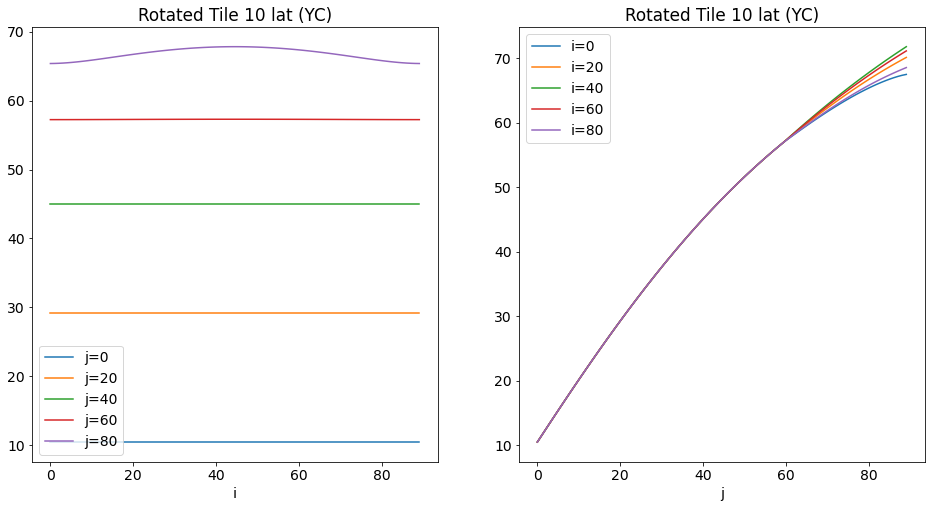

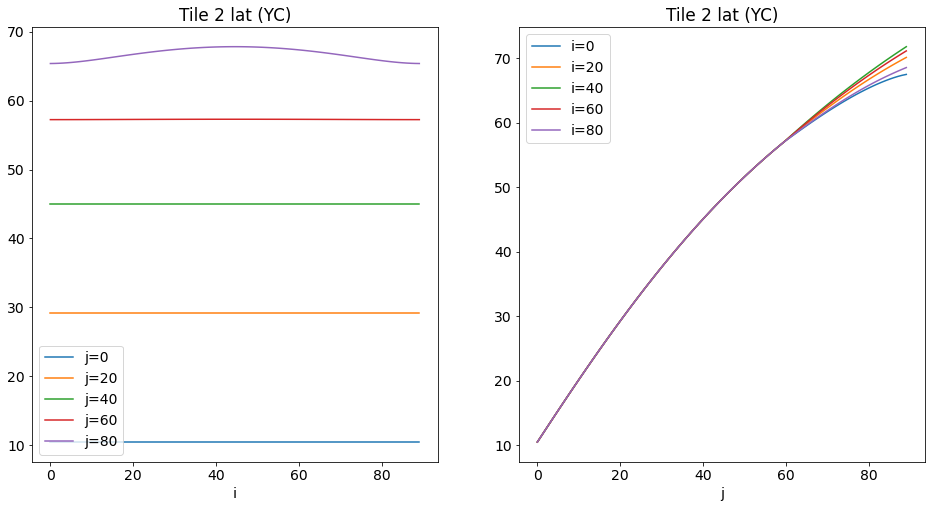

In [12]:
plotCoord(YC10, "Tile 10 lat (YC)","Tile 10 lat (YC)")
plotCoord(YC10t, "Rotated Tile 10 lat (YC)","Rotated Tile 10 lat (YC)")

plotCoord(ds.YC.sel(tile=2), "Tile 2 lat (YC)","Tile 2 lat (YC)")

We see that the rotated grid **Tile 10** is same in behaviour to **Tile 2**.

## Save rotated grid

rotate horizontal grid coordinates:

- XC
- YC
- XG
- YC

Demonstrates we can rotate other relevant grid coordinates

In [13]:
def rotateGrid (ds):
    # YC, XC, YG, XG
    coordList = ["YC","XC","YG","XG"]
    
    for coord in coordList:
        if (coord == "YG") or (coord == "XG"):
            swapDims = {'i_g':'j_g','j_g':'i_g'}
        else:
            swapDims = {'i':'j','j':'i'} 
            
        ds[coord] = ds[coord].T.rename(swapDims)
        ds[coord].values = np.flipud(ds[coord].values)    
    return ds

In [14]:
ds10 = ds.sel(tile=10)
rotateGrid(ds10)

,Array,Chunk
Bytes,2.50 kB,8 B
Shape,"(312,)","(1,)"
Count,936 Tasks,312 Chunks
Type,int64,numpy.ndarray
,Array,Chunk
Bytes,4.99 kB,16 B
Shape,"(312, 2)","(1, 2)"
Count,936 Tasks,312 Chunks
Type,datetime64[ns],numpy.ndarray
,Array,Chunk


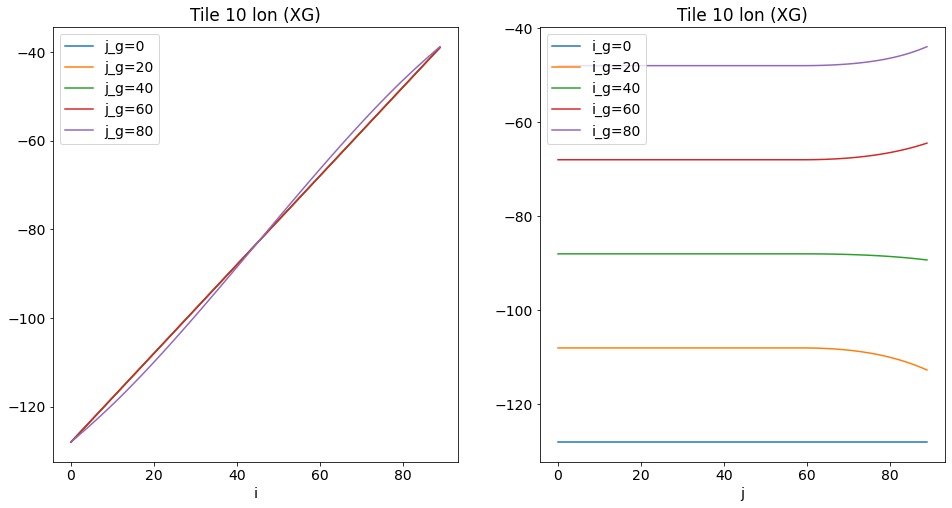

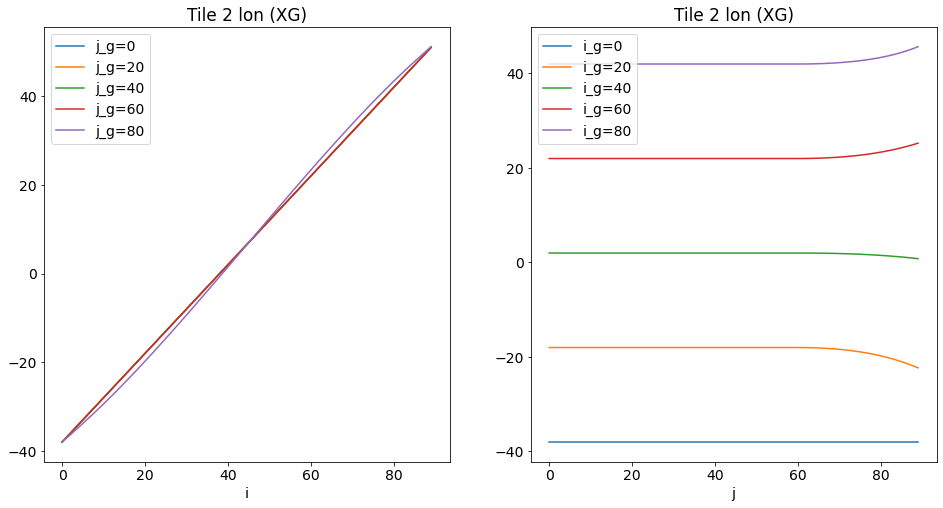

In [15]:
plotCoord(ds10.XG, "Tile 10 lon (XG)","Tile 10 lon (XG)")
plotCoord(ds.XG.sel(tile=2), "Tile 2 lon (XG)","Tile 2 lon (XG)")

To plot scalar valued results, we just have to transpose the data of the ecco output. No more rotated tile nonsense. 

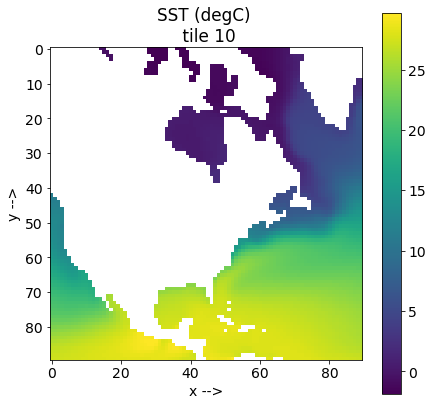

In [21]:
sst = ds10.THETA.transpose(...,'i','j').isel(k=0).mean('time')

plt.rcParams.update({'figure.figsize':(7,7),'font.size':14})

# Step 1, select the tile to plot using the **.isel( )** syntax.
tile_to_plot= sst.where(ds10.hFacC.isel(k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.imshow(tile_to_plot);

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SST (degC) \n tile 10')
plt.xlabel('x -->')
plt.ylabel('y -->')
plt.show()

# Test Case

In [17]:
data = np.random.rand(4,3)
y = [1,2,3]
x = [4,3,2,1]
foo = xr.DataArray(data,coords=[x,y],dims=['x','y'])
foo

<xarray.DataArray (x: 4, y: 3)>
array([[0.61548803, 0.09570058, 0.46727059],
       [0.77216921, 0.46261584, 0.29842938],
       [0.71998738, 0.07809871, 0.48215959],
       [0.52990849, 0.35554662, 0.55674548]])
Coordinates:
  * x        (x) int64 4 3 2 1
  * y        (y) int64 1 2 3

In [18]:
foot = foo.transpose()
foot.values = np.rot90(foo.values)
foot

<xarray.DataArray (y: 3, x: 4)>
array([[0.46727059, 0.29842938, 0.48215959, 0.55674548],
       [0.09570058, 0.46261584, 0.07809871, 0.35554662],
       [0.61548803, 0.77216921, 0.71998738, 0.52990849]])
Coordinates:
  * x        (x) int64 4 3 2 1
  * y        (y) int64 1 2 3

<sub>Written by Escobar, I on December 2020 </sub>